# Aula 13 - Assíncrona - Atividade Prática 02

## Análise de Desempenho do Modelo Através de Engenharia de *Features*

### Grupo 15

#### Ubiratan da Silva Tavares - RA: 23031559

Esta atividade corresponde à nossa segunda atividade prática **valorizada** do curso de *Machine Learning*.

### Instruções:

1 - Reunam-se em grupos de **no máximo 3 pessoas**;

2 - A entrega deve ser realizada via CANVAS através de um artigo no formato PDF gerado a partir do *notebook*. Para tal fim, os grupos poderão utilizar o *Jupyter Notebook* ou o *Google Drive* para implementação do que foi solicitado.

3 - O período de disponibilidade para recebimento da atividade será de **11/09/23 às 17h, até 21/09/23, às 17h**.

4 - No cabeçalho do documento devem constar o **nome completo e o RA de TODOS os membros do grupo**.

### Práticas a serem desenvolvidas

1. Leitura de *dataset* presente em diretório do computador

2. Divisão de dados em grupos de treinamento e teste

3. Criação e aplicação de modelo de *Machine Learning*

4. Seleção de *features* por critério de limiar de variância

5. Extração de *features* por Análise de Componentes Principais (PCA)

**Questão 1)** Nesta atividade, utilize o *k-Nearest Neighbor* para verificar o desempenho do algoritmo de acordo com a engenharia de features empregada. Para tal fim, siga os seguintes passos:

1. Utilize o *dataset ionosphere* presente na pasta datasets para realizar uma tarefa de **classificação binária**.

2. Separe os dados de entrada e saída considerando que a coluna de índice $34$ corresponde ao *label* (*target*) dos dados de cada linha.

3. Separe os dados em dados de treinamento e teste utilizando a proporção $70\%$ e $30\%$, respectivamente, e
`random state = 0`.

4. Estabeleça arbitrariamente o número de vizinhos $k = 5$, inicialmente.

5. Realize a classificação e obtenha os seguintes resultados:

  a) Acurácia
  
  b) Precisão
      
  c) *Recall*
      
  d) F1-Score
      
  e) Plote a Matriz de Confusão
  
      
6. Repita todo o processo dos itens 1 até 5 utilizando o método de **Seleção de *Features* por limiar de variância**, considerando o limiar de $35\%$.

7. Repita todo o processo dos itens 1 até 5 utilizando o método de **Extração de *Features* por Análise de Componentes Principais (PCA)**, considerando a porcentagem de informação a ser mantida no problema de $85\%$.

In [1]:
# importando as bibliotecas
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = None

In [4]:
# Criando a classe DataSet para a manipulação do conjunto de dados
class DataSet:
    
    def __init__(self, data, header=None):
        self.__df = pd.read_csv(data, header=header)
        
    def get_DataFrame(self):
        return self.__df
    
    # dividindo o conjunto de dados em atributos previsores e atributo alvo (target)
    def select_XY(self):
        data = self.__df.values
        X = data[:, :-1]
        y = data[:, -1]
        # converte os atributos previsores para tipo float
        X = X.astype('float32')
        # realiza o pré-processamento do atributo alvo (target) para valores 0 e 1
        label = LabelEncoder()
        y = label.fit_transform(y.astype('str'))
        return X, y
      
    # separando os dados em conjuntos de treinamento e teste (70% treinamento, 30% teste)
    def set_train_test(self, X, y, test_size=0.3):        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
        return X_train, X_test, y_train, y_test
    
    # Método para seleção de atributos por limiar de variância
    def select_XY_variance_threshold(self, limiar_de_variancia=0.35):
        X, y = self.select_XY()
        selecao = VarianceThreshold(threshold=limiar_de_variancia)
        X_new = selecao.fit_transform(X)
        return X_new, y

    # Método para seleção de atributos por PCA
    def select_XY_pca(self, percentual_variancia=0.85):
        X, y = self.select_XY()
        pca = PCA(n_components=percentual_variancia)
        X_new = pca.fit_transform(X)
        return X_new, y

In [5]:
# criando a classe do modelo k-Nearest Neighbor
class KNN:
    
    # criando o modelo k-Nearest Neighbor com k=5
    def __init__(self, n_neighbors=5):        
        self.__modelo = KNeighborsClassifier(n_neighbors=n_neighbors)
        
    # treinando o modelo com o dados de treinamento sem seleção de features
    def treinamento(self, X_train, y_train):
        # criando um pipeline com MinMaxScaler e o modelo
        steps = [('mms', MinMaxScaler()), 
                 ('m', self.__modelo)]
        pipeline = Pipeline(steps=steps)
        return pipeline.fit(X_train, y_train)    
   
    # prevendo com o modelo treinado
    def prevendo(self, X_train, X_test, y_train):
        modelo_treinado = self.treinamento(X_train, y_train)
        return modelo_treinado.predict(X_test)      
   
    # avaliando o desempenho do modelo treinado
    def avaliando(self, X_train, X_test, y_train, y_test):
        y_prev = self.prevendo(X_train, X_test, y_train)
        accuracy = accuracy_score(y_test, y_prev)
        precision = precision_score(y_test, y_prev)
        recall = recall_score(y_test, y_prev)
        f1 = f1_score(y_test, y_prev)
        matrix = confusion_matrix(y_test, y_prev)
        report = classification_report(y_test, y_prev, target_names = ['B', 'G'])        
        return y_prev, accuracy, precision, recall, f1, matrix, report
                                    
    # plote
    def plotando(self, matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['B', 'G'], yticklabels=['B', 'G'])
        plt.xlabel("Predito")
        plt.ylabel("Verdadeiro")
        plt.title("Matriz de Confusão")
        plt.show()

    # exibindo os resultados das métricas avaliativas
    def resultados(self, X_train, X_test, y_train, y_test):
        y_prev, accuracy, precision, recall, f1, matrix, report = self.avaliando(X_train, X_test, y_train, y_test)
        print(f"\nAcurácia: {accuracy*100:.2f} %")
        print(f"Precisão: {precision*100:.2f} %")
        print(f"Recall: {recall*100:.2f} %")
        print(f"F1-Score: {f1*100:.2f} %")
        print(f"Relatório da avaliação:\n\n{report}\n")
        self.plotando(matrix)        

### 1. Leitura de dataset presente em diretório do computador

In [6]:
# carrega o conjunto de dados
ds = DataSet('dataset/ionosphere.data')

In [7]:
# retornando o dataframe pandas
df = ds.get_DataFrame()

In [8]:
# exibindo as 5 primeiras instâncias do conjunto de dados
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,1.00,-0.06,0.85,0.02,0.83,-0.38,1.00,0.04,0.85,-0.18,0.60,-0.45,0.61,-0.38,0.84,-0.39,0.58,-0.32,0.57,-0.30,0.37,-0.47,0.57,-0.51,0.41,-0.46,0.21,-0.34,0.42,-0.54,0.19,-0.45,g
1,1,0,1.00,-0.19,0.93,-0.36,-0.11,-0.94,1.00,-0.05,0.51,-0.68,0.34,-0.70,-0.52,-0.98,0.05,-0.62,0.33,-1.00,-0.13,-0.45,-0.18,-0.36,-0.20,-0.27,-0.20,-0.18,-0.19,-0.12,-0.17,-0.06,-0.14,-0.02,b
2,1,0,1.00,-0.03,1.00,0.00,1.00,-0.12,0.89,0.01,0.73,0.05,0.85,0.01,0.55,0.00,0.84,-0.14,0.76,-0.09,0.71,-0.28,0.43,-0.12,0.58,-0.40,0.59,-0.22,0.43,-0.17,0.60,-0.24,0.56,-0.38,g
3,1,0,1.00,-0.45,1.00,1.00,0.71,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.15,0.54,-0.39,-1.00,-0.54,-0.70,1.00,0.00,0.00,1.00,0.91,0.52,1.00,1.00,-0.20,0.26,1.00,-0.32,1.00,b
4,1,0,1.00,-0.02,0.94,0.07,0.92,-0.23,0.77,-0.16,0.53,-0.20,0.56,-0.01,0.34,-0.27,0.53,-0.22,0.45,-0.18,0.06,-0.36,0.02,-0.53,0.03,-0.65,0.13,-0.53,0.02,-0.62,-0.06,-0.60,-0.05,-0.66,g


In [9]:
# verificando a quantidade de instâncias e atributos
df.shape

(351, 35)

In [10]:
# verificando os tipos dos atributos
df.dtypes

0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34     object
dtype: object

In [11]:
# verificando se há dados faltantes
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

### 2 - Análise de Desempenho do Modelo *k-Nearest Neighbor* sem Engenharia de Features

#### 2.1 - Divisão de dados em grupos de treinamento e teste

In [12]:
# criando os atributos previsores X e o atributo alvo y
X, y = ds.select_XY()       

In [13]:
# separando o atributos previsores e o atributo alvo nos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = ds.set_train_test(X, y)

#### 2.2 - Criação do Modelo k-Nearest Neighbor

In [14]:
# criando o modelo
knn = KNN()

#### 2.3 - Avaliação do Modelo k-Nearest Neighbor


Acurácia: 84.91 %
Precisão: 81.08 %
Recall: 96.77 %
F1-Score: 88.24 %
Relatório da avaliação:

              precision    recall  f1-score   support

           B       0.94      0.68      0.79        44
           G       0.81      0.97      0.88        62

    accuracy                           0.85       106
   macro avg       0.87      0.82      0.84       106
weighted avg       0.86      0.85      0.84       106




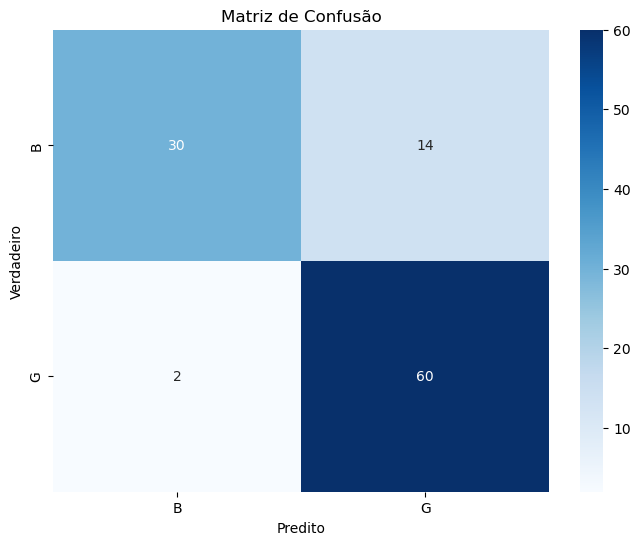

In [15]:
# exibindo os resultados da performance do modelo no conjunto de treinamento
knn.resultados(X_train, X_test, y_train, y_test)

### 3 - Análise de Desempenho do Modelo *k-Nearest Neighbor* com Engenharia de Features

#### 3.1 - Seleção de features por critério de limiar de variância

In [16]:
# criando os atributos previsores X pelo método da seleção de features e o atributo alvo y
X, y = ds.select_XY_variance_threshold()

In [17]:
# separando o atributos previsores e o atributo alvo nos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = ds.set_train_test(X, y)


Acurácia: 81.13 %
Precisão: 77.63 %
Recall: 95.16 %
F1-Score: 85.51 %
Relatório da avaliação:

              precision    recall  f1-score   support

           B       0.90      0.61      0.73        44
           G       0.78      0.95      0.86        62

    accuracy                           0.81       106
   macro avg       0.84      0.78      0.79       106
weighted avg       0.83      0.81      0.80       106




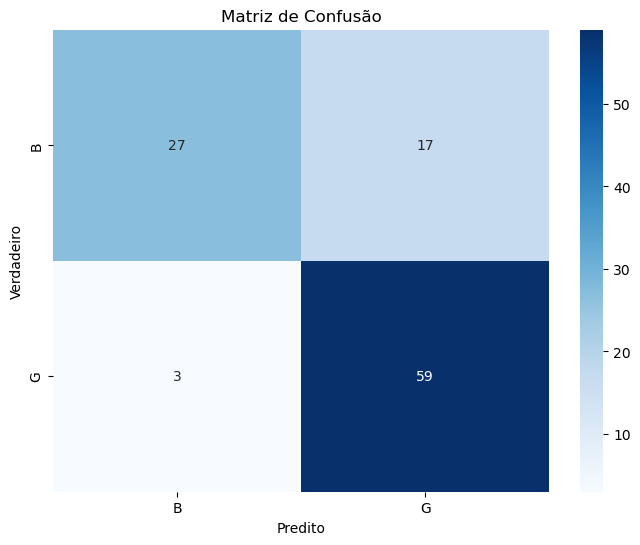

In [18]:
# exibindo os resultados da performance do modelo no conjunto de treinamento
knn.resultados(X_train, X_test, y_train, y_test)

#### 3.2 - Extração de features por Análise de Componentes Principais (PCA)

In [19]:
# criando os atributos previsores X pelo método de extração de features por análise de componentes principais e o atributo alvo y
X, y = ds.select_XY_pca()

In [20]:
# separando o atributos previsores e o atributo alvo nos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = ds.set_train_test(X, y)


Acurácia: 87.74 %
Precisão: 84.51 %
Recall: 96.77 %
F1-Score: 90.23 %
Relatório da avaliação:

              precision    recall  f1-score   support

           B       0.94      0.75      0.84        44
           G       0.85      0.97      0.90        62

    accuracy                           0.88       106
   macro avg       0.89      0.86      0.87       106
weighted avg       0.89      0.88      0.87       106




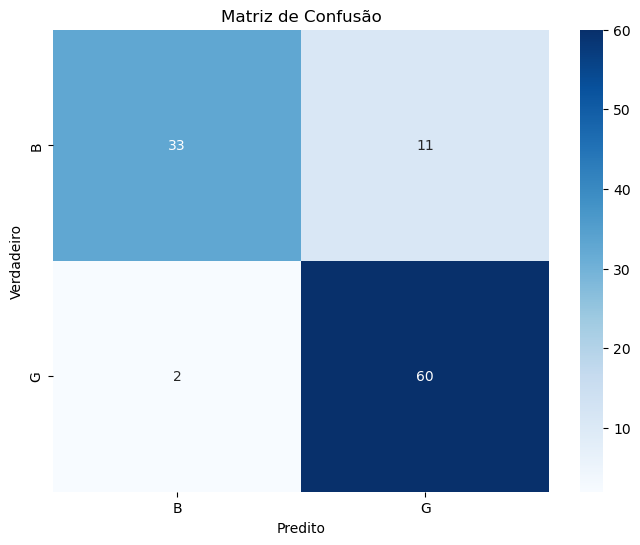

In [21]:
knn.resultados(X_train, X_test, y_train, y_test)

**Questão 2)** Compare os resultados obtidos em todos os processos do item anterior e justifique as diferenças obtidas através dos conceitos de engenharia de *features* estudados durante as aulas síncronas.

A análise dos resultados de desempenho do modelo k-Nearest Neighbor (KNN) nos cenários de sem e com engenharia de features, revela algumas diferenças significativas que podem ser justificadas.

##### 1 -  Análise de Desempenho do Modelo KNN sem Engenharia de Features:

Acurácia: 84.91%
Precisão: 81.08%
Recall: 96.77%
F1-Score: 88.24%

Neste cenário, o KNN foi aplicado nos atributos pré-processados pela classe MinMaxScaler() no conjunto de dados originais. 

Os resultados mostram uma acurácia relativamente alta, com um recall notavelmente alto, o que significa que o modelo conseguiu identificar a maioria das observações positivas (classe "G"). No entanto, a precisão é um pouco mais baixa, indicando que o modelo também classificou alguns observações negativas (classe "B") incorretamente como positivas.

##### 2 - Análise de Desempenho do Modelo KNN com Engenharia de Features:

###### 2.1 - Seleção de Features por Critério de Limiar de Variância:

Acurácia: 81.13%
Precisão: 77.63%
Recall: 95.16%
F1-Score: 85.51%

Neste cenário, a engenharia de features foi aplicada na forma de seleção de features por critério de limiar de variância. Isso significa que os atributos com baixa variância foram removidos do conjunto de dados. As diferenças em relação ao cenário sem engenharia de features são as seguintes:

A acurácia diminuiu ligeiramente, indicando que a seleção de features por limiar de variância removeu alguns atributos que poderiam ser úteis para a classificação.

A precisão diminuiu, o que significa que o modelo está classificando mais exemplos negativos como positivos. Isso pode ser devido à perda de informações causada pela remoção de atributos com baixa variância.

O recall melhorou significativamente. Isso ocorre porque o modelo se tornou mais sensível à classe "B", identificando mais exemplos positivos dessa classe. A seleção de features ajudou a reduzir a confusão com a classe "G".


###### 2.2 -  Extração de Features por Análise de Componentes Principais (PCA):

Acurácia: 87.74%
Precisão: 84.51%
Recall: 96.77%
F1-Score: 90.23%

Neste cenário, a engenharia de features foi realizada por meio da extração de features usando Análise de Componentes Principais (PCA). Isso significa que os atributos originais foram transformados em um novo conjunto de atributos que são combinações lineares dos atributos originais. As diferenças em relação ao cenário sem engenharia de features são as seguintes:

A acurácia aumentou, indicando que a extração de features por PCA conseguiu capturar informações relevantes de forma mais eficaz do que os atributos originais.

A precisão também melhorou, indicando que o modelo está cometendo menos falsos positivos em comparação com o cenário sem engenharia de features.

O recall permaneceu alto, o que significa que o modelo ainda é capaz de identificar a maioria dos exemplos positivos.


##### Justificando as Diferenças:

As diferenças observadas nos resultados podem ser justificadas da seguinte forma:

* A seleção de features por limiar de variância removeu atributos com baixa variância, o que pode ter removido ruídos, mas também informações úteis. Isso levou a uma redução na acurácia e precisão, mas com uma melhoria no recall.


* A extração de features por PCA transformou os atributos originais em um novo espaço de features que captura a variabilidade dos dados de forma mais eficiente. Isso resultou em um aumento na acurácia, precisão e recall.

Em resumo, a engenharia de features desempenhou um papel crucial na melhoria do desempenho do modelo KNN, permitindo que ele aprendesse representações mais informativas dos dados, o que se refletiu em melhores métricas de avaliação. A escolha entre a seleção de features e a extração de features depende do conjunto de dados e dos objetivos do modelo.